### Simulating Lung Cancer Growth

*Newton et al. (2012) use simulation to estimate the mean first passage time—the number of steps, on average, it takes for cancer to pass from the lung to each other location in the body, “something a static autopsy data set cannot give us directly.” The authors conclude that their study gives “important baseline quantitative insight into the structure of lung cancer progression networks.”*

In [26]:
import numpy as np

# Get transition matrix
data = np.genfromtxt('lungcancer.csv', dtype=float, delimiter=',', names=True)
P = []
for i in range(50):
    P.append(list(data[i]))
# Correct distribution that does not sum up to 1
P = np.array(P)
for i in range(50):
    P[i] = P[i]/np.sum(P[i])

In [27]:
def markov(init, mat, num):
    # init: initial distribution to generate a start on the graph
    # mat: transition matrix
    # num: number of nodes on graph needs to visit
    # 
    nodelst = list(range(50))
    curr = np.random.choice(nodelst, p=init)
    visited = [curr]
    passage_time=0
    while len(visited)<num:
        curr = np.random.choice(nodelst, p=mat[curr])
        if curr not in visited:
            visited.append(curr)
        passage_time+=1
        
    return passage_time

In [28]:
# Prepare initial distribution
# Always starts from node #23
p0 = np.zeros(50)
p0[22] = 1

In [51]:
# Check mean passage-time for cancer to cover 10-24 nodes
pt = np.zeros(15)
rep = 1000
for n in range(10, 25):
    temp = 0
    for i in range(rep): #repeat each n-passage time for 50 times
        temp+= markov(p0, P, n)
    pt[n-10] = temp/rep

Text(0.5, 1.0, 'Lung Cancer Evolution')

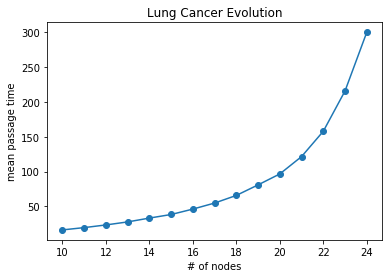

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(list(range(10,25)), pt, 'o-')
plt.xlabel('# of nodes')
plt.ylabel('mean passage time')
plt.title('Lung Cancer Evolution')